In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time

In [37]:
player_list = pd.read_csv('data/FantasyPros_Fantasy_Football_Points.csv')

player_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 709 entries, 0 to 708
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   #       707 non-null    float64
 1   Player  707 non-null    object 
 2   Pos     707 non-null    object 
 3   Team    707 non-null    object 
 4   1       707 non-null    object 
 5   2       707 non-null    object 
 6   3       707 non-null    object 
 7   4       707 non-null    object 
 8   5       707 non-null    object 
 9   6       707 non-null    object 
 10  7       707 non-null    object 
 11  8       707 non-null    object 
 12  9       707 non-null    object 
 13  10      707 non-null    object 
 14  11      707 non-null    object 
 15  12      707 non-null    object 
 16  13      707 non-null    object 
 17  14      707 non-null    object 
 18  15      707 non-null    object 
 19  16      707 non-null    object 
 20  17      707 non-null    object 
 21  18      707 non-null    object 
 22  AV

In [26]:
## Load Data

df_2019 = pd.read_csv('data/fantasy_data_2019.csv')
df_2020 = pd.read_csv('data/fantasy_data_2020.csv')
df_2021 = pd.read_csv('data/fantasy_data_2021.csv')
df_2022 = pd.read_csv('data/fantasy_data_2022.csv')
df_2023 = pd.read_csv('data/fantasy_data_2023.csv')

In [27]:
## Define and assign Fantasy points

## Calculates Fantasy points for each player in a dataframe
def fantasy_points(df):
  all_points = []
  for i,row in df.iterrows():
    player_points = 0
    player_points += 0.1 * (row['rush_yds'] + row['rec_yds'])
    player_points += 6 * (row['rush_td'] + row['rec_td'])
    player_points += (1/25) * row['pass_yds']
    player_points += (4) * row['pass_td']
    player_points += (-2) * row['int']
    ## No fumbles, no rush yards for wrs
    all_points.append(player_points)
  return all_points

df_list = [df_2019, df_2020, df_2021, df_2022, df_2023]
for df in df_list:
  df['fantasy_pts'] = fantasy_points(df)


for i,df in enumerate(df_list):
  if i == 4:
    break
  temp = df_list[i+1].rename(columns = {'fantasy_pts': 'next_yr_pts'})
  df_list[i] = pd.merge(df, temp[['name', 'position', 'next_yr_pts']], on=['name', 'position'], how='inner')

df_2019 = df_list[0]
df_2020 = df_list[1]
df_2021 = df_list[2]
df_2022 = df_list[3]

  
  



Index(['name', 'position', 'team_pts', 'opp_pts', 'cmp', 'att', 'pass_yds',
       'pass_td', 'int', 'rating', 'sacked', 'rush_att', 'rush_yds', 'rush_td',
       'tgt', 'rec_yds', 'rec_td', 'snap_pct', 'rec', 'fantasy_pts',
       'next_yr_pts'],
      dtype='object')


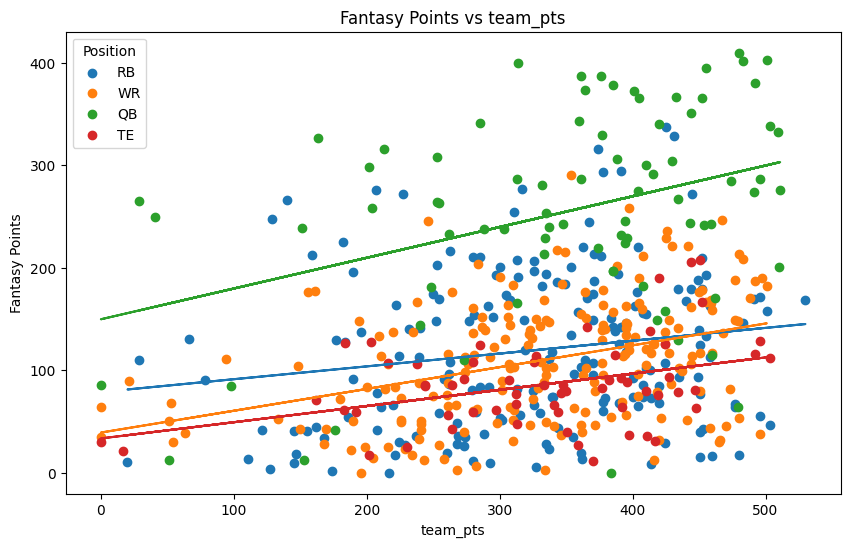

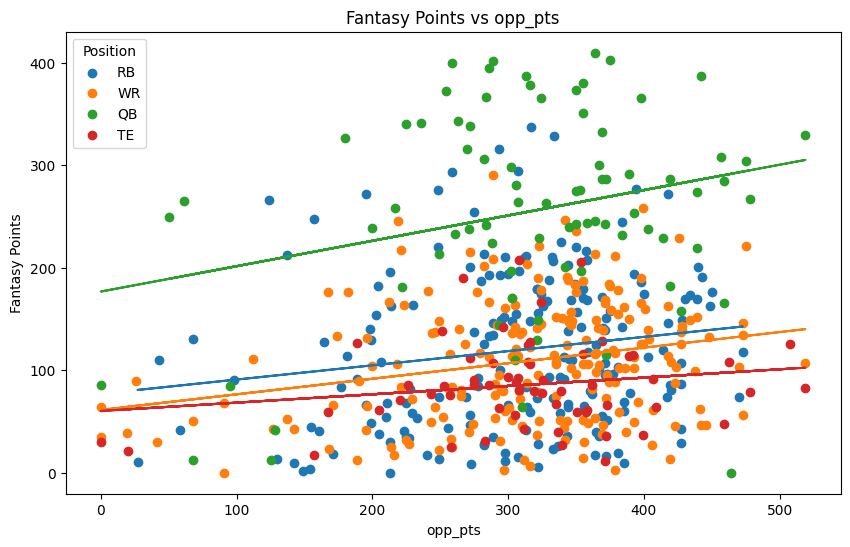

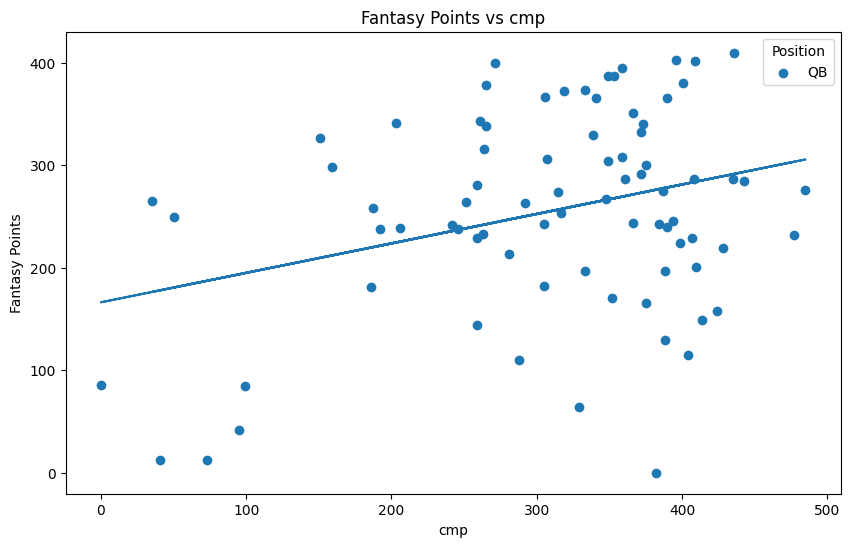

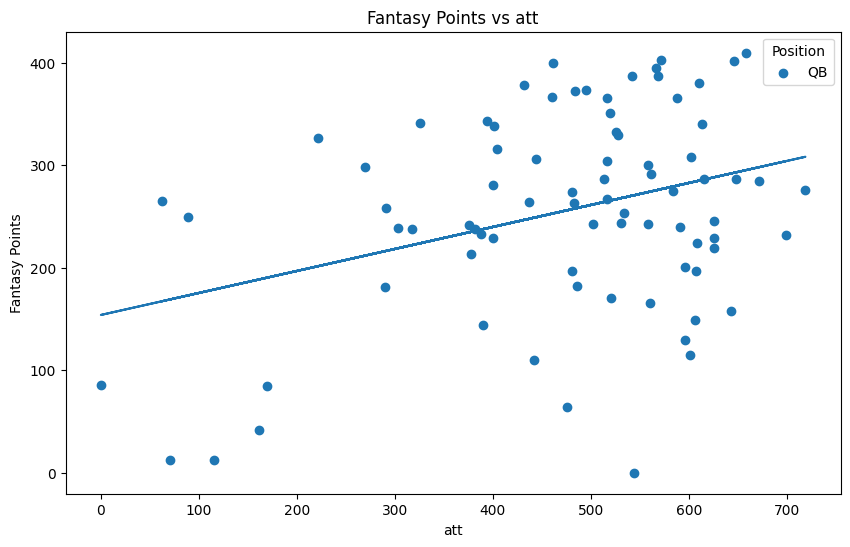

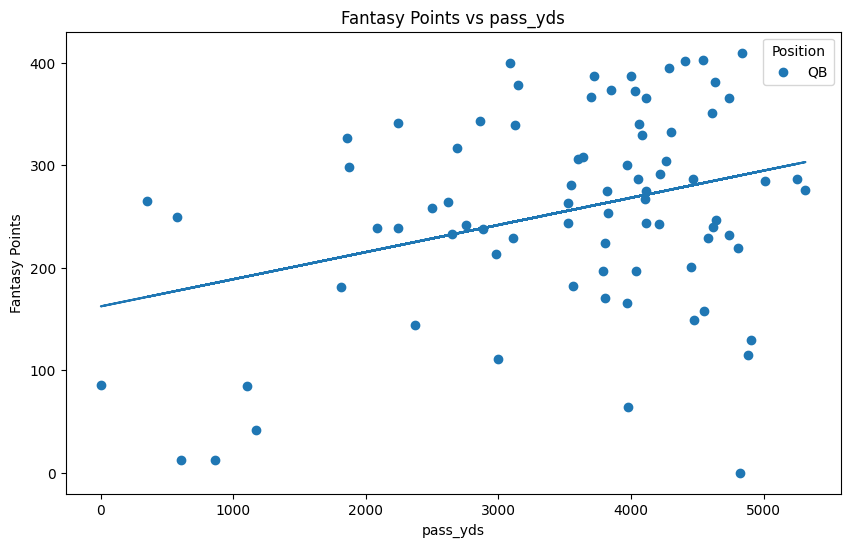

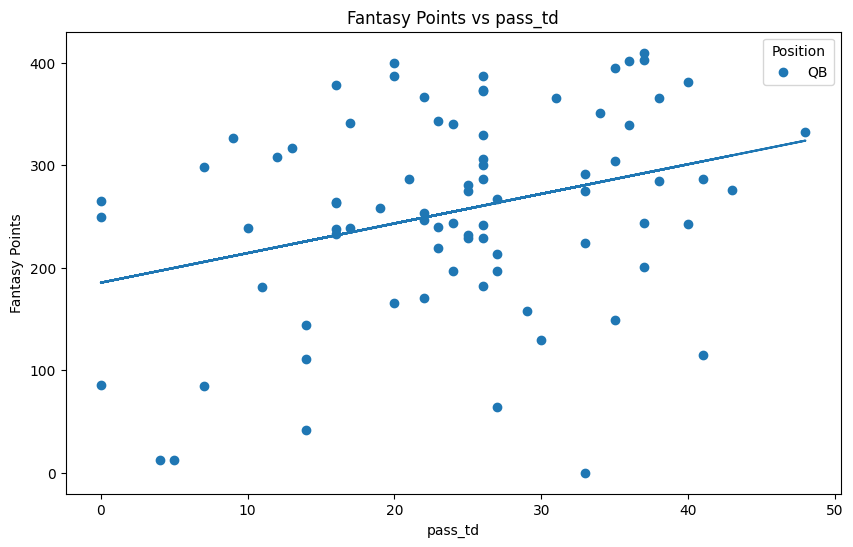

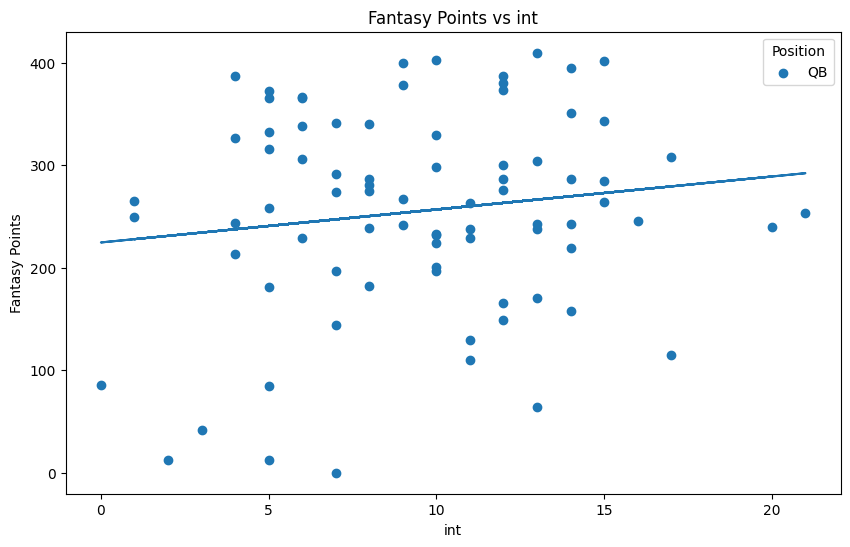

Could not fit line for rating and QB
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value
 ** On entry to DLASCL parameter number  5 had an illegal value
 ** On entry to DLASCL parameter number  4 had an illegal value


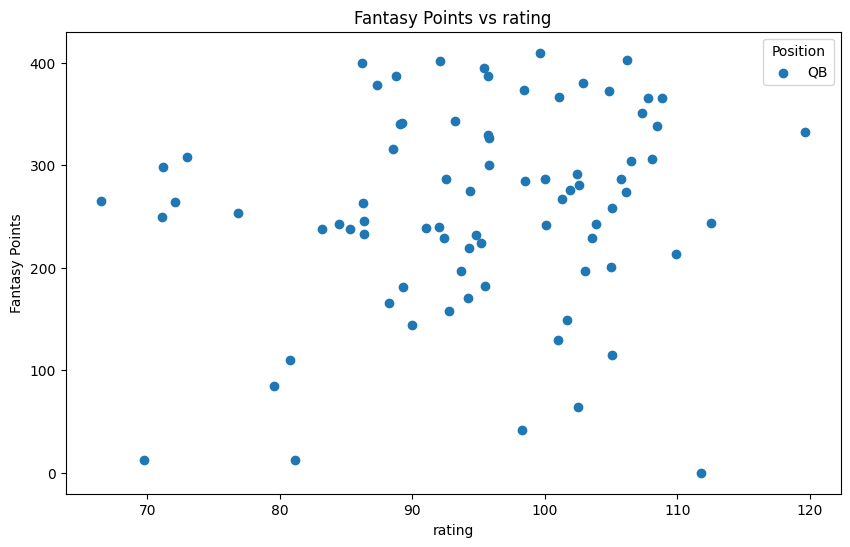

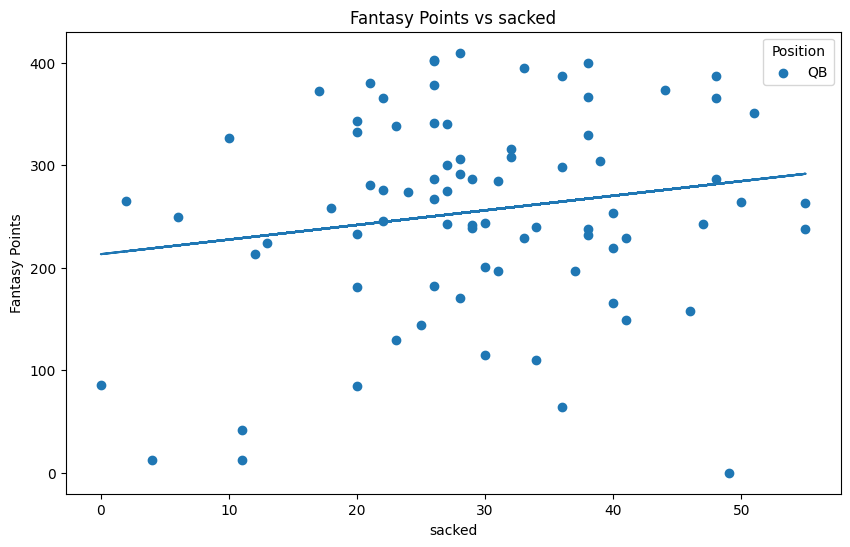

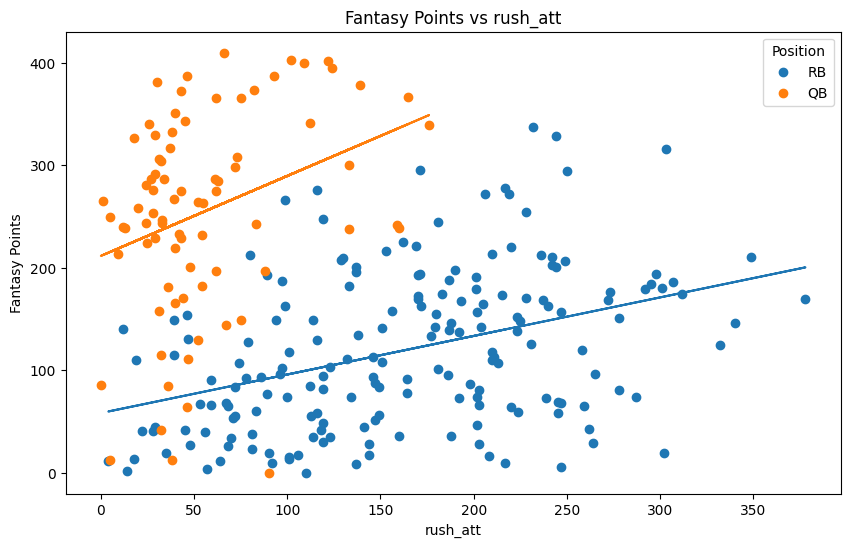

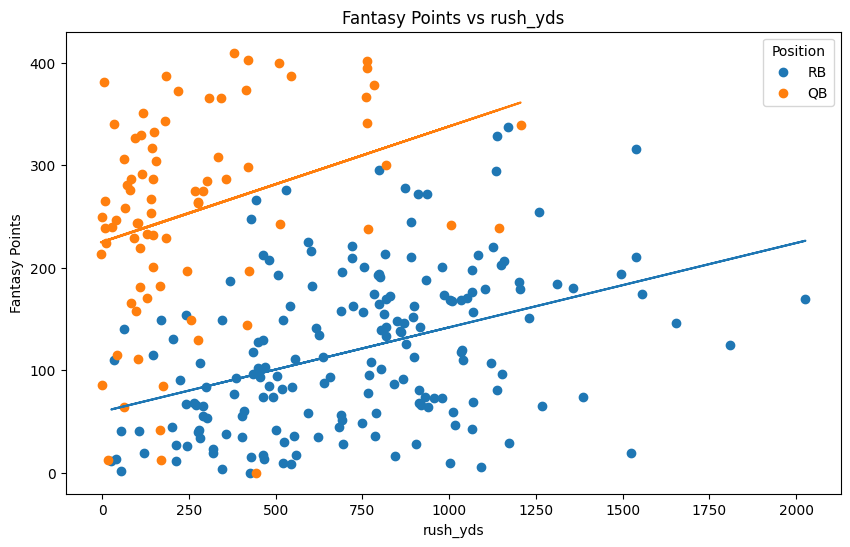

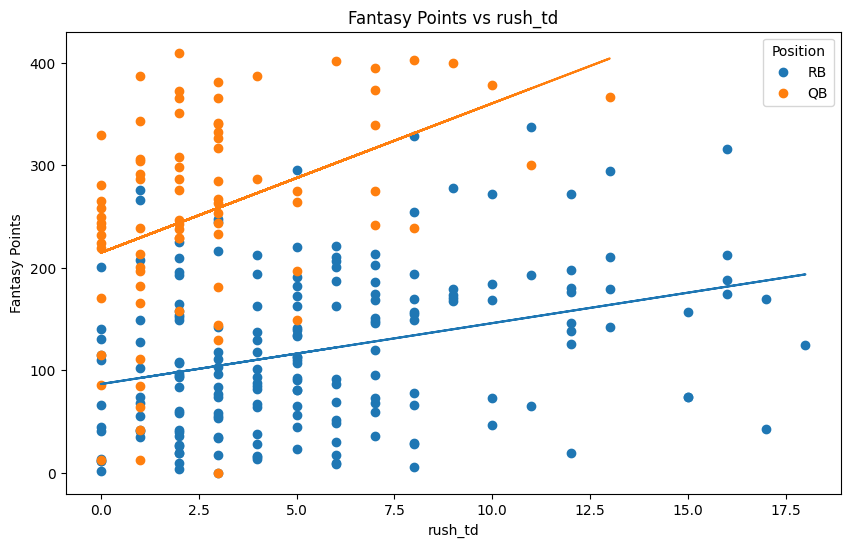

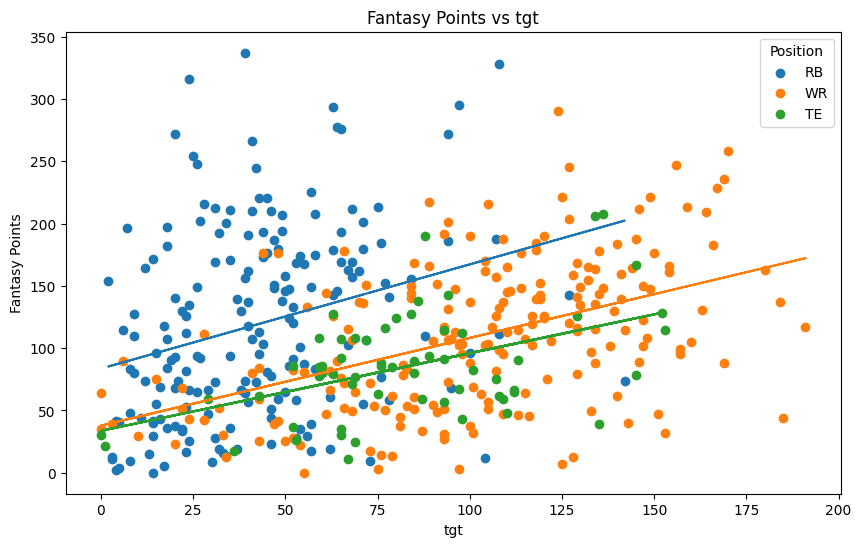

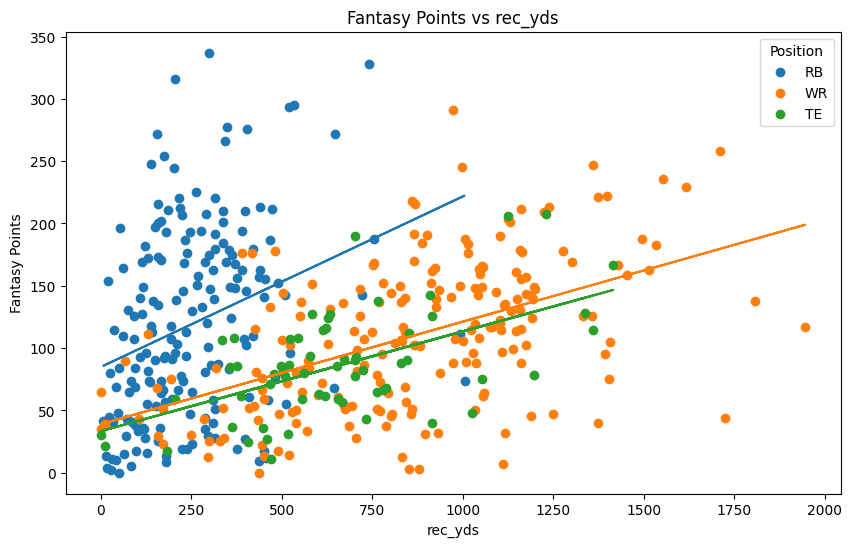

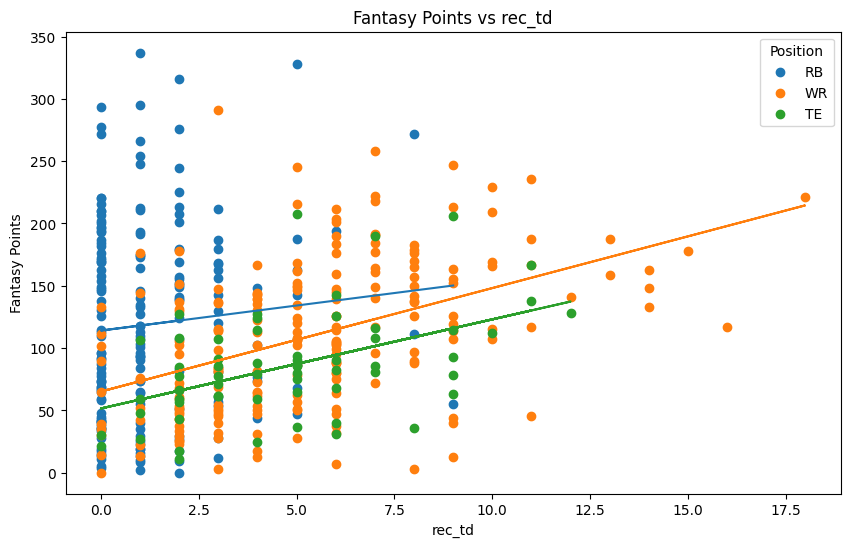

/var/folders/5c/43zn8f2d2djc2zb4cm_3wycm0000gn/T/ipykernel_16647/575807539.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Position')


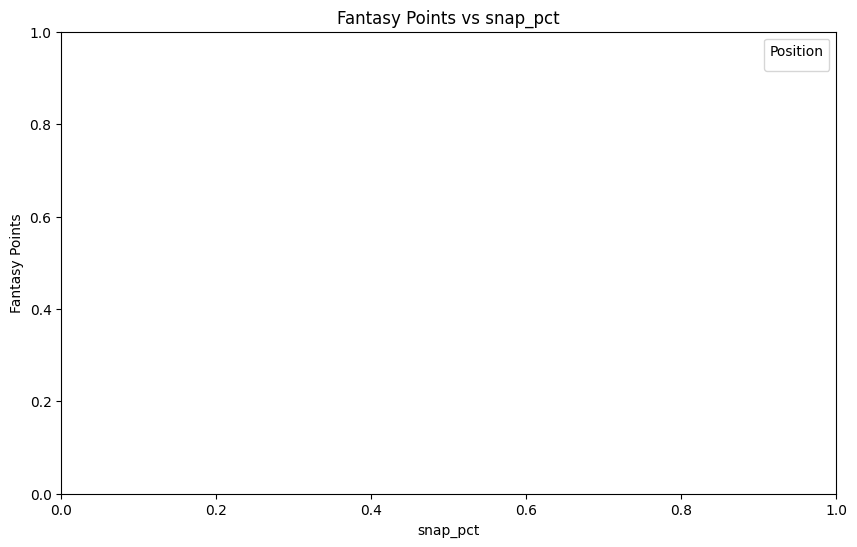

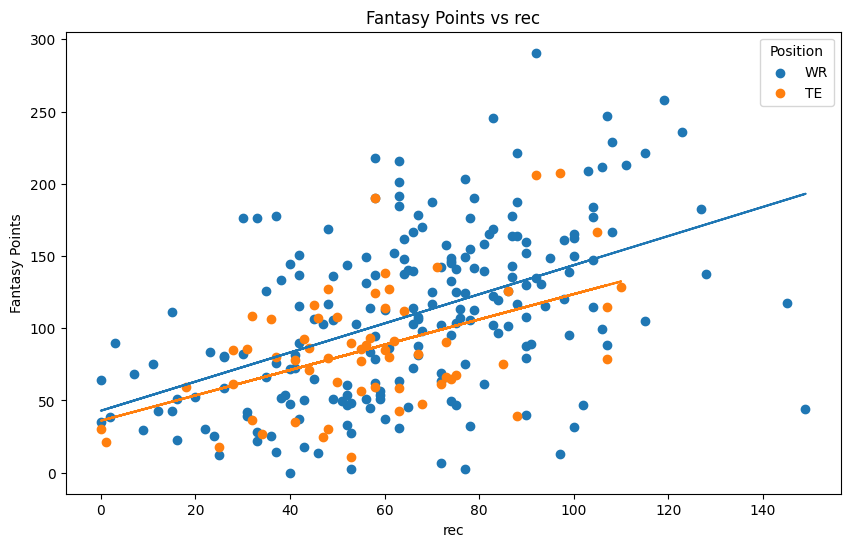

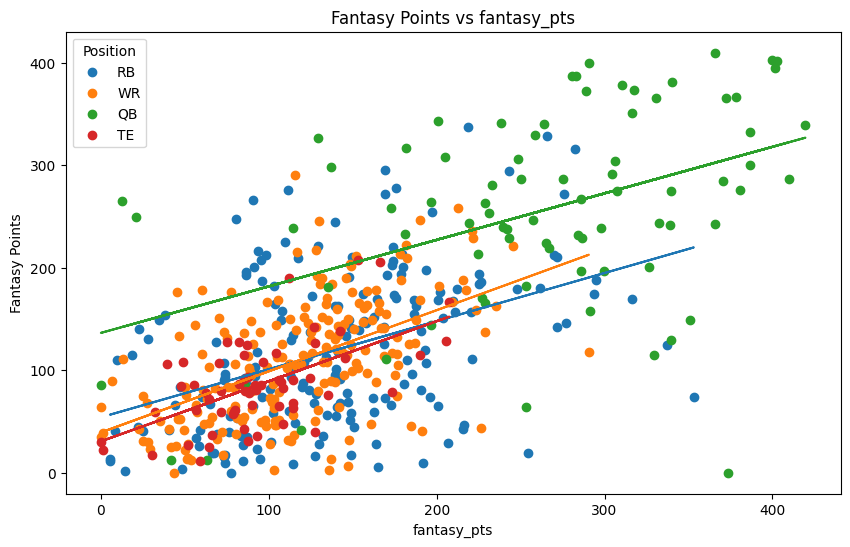

In [36]:
df_full = pd.concat([df_2019, df_2020, df_2021, df_2022], ignore_index=True,axis=0)

print(df_full.columns)

feature_columns = [col for col in df_full.columns if col not in ['name', 'position', 'next_yr_pts']]

# Plot each feature against fantasy points with position as a group
for feature in feature_columns:
    plt.figure(figsize=(10, 6))
    for position in df_full['position'].unique():
        subset = df_full[df_full['position'] == position]
        if subset[feature].var() >= 1:

            plt.scatter(subset[feature], subset['next_yr_pts'], marker='o', linestyle='-', label=position)

            # Fit a line of best fit
            try:
                    fit = np.polyfit(subset[feature], subset['next_yr_pts'], 1)
                    fit_fn = np.poly1d(fit)
                    plt.plot(subset[feature], fit_fn(subset[feature]), linestyle='-')
            except np.linalg.LinAlgError:
                print(f"Could not fit line for {feature} and {position}")

    plt.title(f'Fantasy Points vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Fantasy Points')
    plt.legend(title='Position')
    plt.show()